# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Rizaki Akbar
- **Email:** rizakiakbar004@gmail.com
- **ID Dicoding:** rizaki_akbar_r0wz

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca (weathersit), suhu (temp), kelembaban (hum), dan kecepatan angin (windspeed) terhadap jumlah pengguna sepeda?
- Apakah hari libur (holiday) mempengaruhi jumlah pengguna sepeda?
- Bagaimana tren penggunaan sepeda dari tahun ke tahun?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Load Data Day

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Load Data Hour

In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

#### Menilai Data Day
##### 1. pertama kita mengecek tipe data day apakah ada keanehan

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- disini kita melithat ada tipe data yang tidak sesuai yaitu dteday yang seharusnya datetime tetapi disitu object

##### 2.Selanjutnya kita cek apakah ada data yang missing

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- tidak ada missing data yang terjadi

##### 3.lanjut cek apakah ada data yang duplikasi dan keanehan data

In [6]:
print("Jumlah Duplikasi data: ", day_df.duplicated().sum())
day_df.describe()

Jumlah Duplikasi data:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- setelah kita melakukan cek data Day ternyata tidak ada duplikasi dan keanehan yang terjadi

#### Cek Data Hour
##### 1.cek tipe data hour

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### 2.cek Missing data

In [8]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- tidak ada terjadinya missing data

##### 3.Mengecek duplikasi data dan keanehan data

In [9]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi data:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Insight :
- tidak ada duplikasi data yeng terdeteksi
- tidak ada yang data statistik yang aneh terjadi 

### Cleaning Data

1. mengubah detail terkait dteday yr, mnth, hr agar mudah di pahami
2. mengubah tipe data agar sesuai

In [10]:
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
}, inplace=True)

day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
}, inplace=True)

hour_df.head()

,instant,date,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
# Mengubah tipe data kolom date menjadi datetime
day_df['date'] = pd.to_datetime(day_df['date'])
hour_df['date'] = pd.to_datetime(hour_df['date'])

day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

##### explore data Day

In [13]:
day_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


dapat dilihat pada stastistik diatas bahwa jumlah peminjaman sepeda dari tahun 2011 hingga tahun 2012 sebanyak minimal 22 orang dan yang teregister sebanyak 20 orang ini berarti 2 orang lainnya tidak register dan maksimal peminjaman sepeda dalam satu hari sebanyak 8714 orang dan yang teregister sebanyak 6946.

In [14]:
day_df.groupby(by="weathersit").agg({
    "date": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

date   cnt                               
           nunique   max  min         mean          std
weathersit                                             
1              463  8714  431  4876.786177  1879.483989
2              247  8362  605  4035.862348  1809.109918
3               21  4639   22  1803.285714  1240.284449

dari statistik data perhari diatas dapat kita simpulkan bahwa peminjaman sepeda pada tahun 2011 hingga 2012 rata rata peminjaman sepeda tertinggi adalah pada saat cuaca cerah dan sedikit awan dan terendah pada saat cuaca hujan atau salju ringan hingga badai petir

In [15]:
day_df.groupby(by="season").cnt.sum().sort_values(ascending=False)

season
3    1061129
2     918589
4     841613
1     471348
Name: cnt, dtype: int64

dari statistik diatas dapat kita simpulkan bahwa peminjaman sepeda terbanyak pada saat musim gugur dan paling rendah pada saat musim semi

In [16]:
day_df.groupby(by="year").cnt.sum().sort_values(ascending=False)

year
1    2049576
0    1243103
Name: cnt, dtype: int64

In [17]:
day_df.groupby(by="holiday").cnt.sum().sort_values(ascending=False)

holiday
0    3214244
1      78435
Name: cnt, dtype: int64

dari data diatas dapat dilihat bahwa pengguna rental sepeda tertinggi adalah pada saat hari kerja

##### Explorasi data Hour

In [18]:
hour_df.describe(include="all")

,instant,date,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


jika kita liat pada data statistik peminjaman sepeda perjam pada tahun 2011 hingga 2012 sebanyak minimal 1 orang perjam dan maksimal terbanyak sebesar 977 orang dengan standar deviasinya 181.387. 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh cuaca (weathersit), suhu (temp), kelembaban (hum), dan kecepatan angin (windspeed) terhadap jumlah pengguna sepeda?

In [19]:
all_df = hour_df.copy()
mapping_year = {0: '2011', 1: '2012'}
mapping_month = {1: 'Jan', 2: 'Feb', 3: 'March', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
mapping_season = {1:'Spring', 2: 'Summer', 3:'Fall', 4:'Winter'}
mapping_weathersit = {1:'Clear', 2: 'Cloudy', 3:'Light Snow/Rain', 4:'Heavy Rain/Ice Pallets'}
mapping_holiday = {0:'Holiday', 1:'Not On Holiday'}

all_df['year'] = all_df['year'].map(mapping_year)
all_df['month'] = all_df['month'].map(mapping_month)
all_df['weekday'] = all_df['date'].dt.day_name()
all_df['season'] = all_df['season'].map(mapping_season)
all_df['weathersit'] = all_df['weathersit'].map(mapping_weathersit)
all_df['temp'] = all_df['temp'] * 41
all_df['hum'] = hour_df['hum'] * 100
all_df['windspeed'] = hour_df['windspeed'] * 67
all_df['holiday'] = all_df['holiday'].map(mapping_holiday)
all_df = all_df[['date', 'year', 'month', 'hr', 'weekday', 'workingday', 'season', 'weathersit','cnt', 'registered', 'casual', 'temp', 'hum',	'windspeed', 'holiday']]

print(all_df)

            date  year month  hr   weekday  workingday  season weathersit  \
0     2011-01-01  2011   Jan   0  Saturday           0  Spring      Clear   
1     2011-01-01  2011   Jan   1  Saturday           0  Spring      Clear   
2     2011-01-01  2011   Jan   2  Saturday           0  Spring      Clear   
3     2011-01-01  2011   Jan   3  Saturday           0  Spring      Clear   
4     2011-01-01  2011   Jan   4  Saturday           0  Spring      Clear   
...          ...   ...   ...  ..       ...         ...     ...        ...   
17374 2012-12-31  2012   Dec  19    Monday           1  Spring     Cloudy   
17375 2012-12-31  2012   Dec  20    Monday           1  Spring     Cloudy   
17376 2012-12-31  2012   Dec  21    Monday           1  Spring      Clear   
17377 2012-12-31  2012   Dec  22    Monday           1  Spring      Clear   
17378 2012-12-31  2012   Dec  23    Monday           1  Spring      Clear   

       cnt  registered  casual   temp   hum  windspeed  holiday  
0       1

<Figure size 800x600 with 0 Axes>

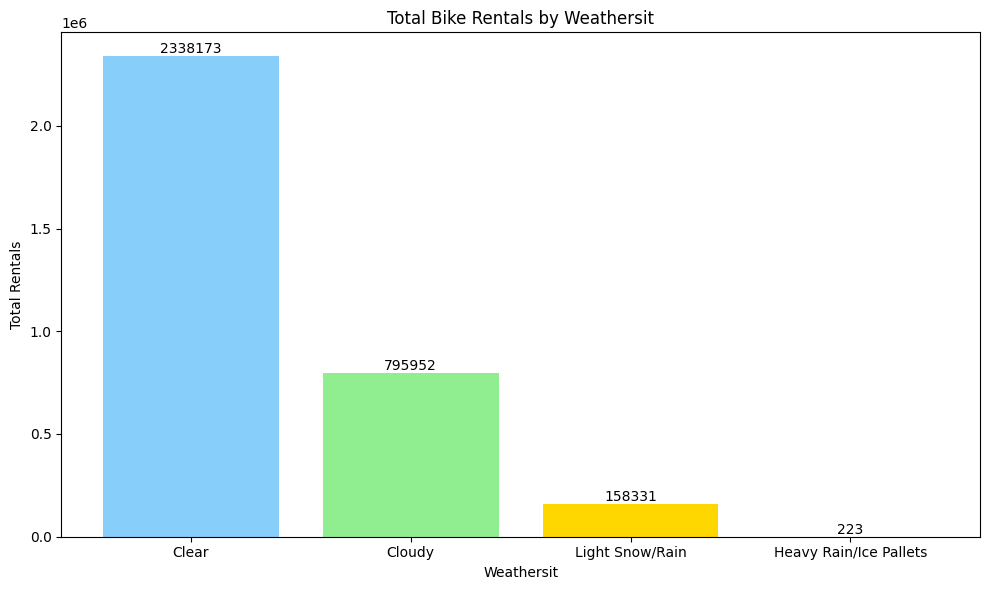

In [20]:
# Distribusi Jumlah Pengguna Sepeda berdasarkan Cuaca
weathersit_count =  all_df.groupby('weathersit').cnt.sum().sort_values(ascending=False)
weathersit_colors = {
    'Clear': 'lightskyblue',
    'Cloudy': 'lightgreen',
    'Light Snow/Rain': 'gold',
    'Heavy Rain/Ice Pallets': 'lightcoral'
}

plt.figure(figsize=(8, 6))

sizes = weathersit_count.values
labels = weathersit_count.index
colors = [weathersit_colors[label] for label in labels]

plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color=colors)

plt.xlabel('Weathersit')
plt.ylabel('Total Rentals')
plt.title('Total Bike Rentals by Weathersit')
for i, value in enumerate(sizes):
    plt.text(i, value + 500, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()

dari diagram batang ini dapat terlihat bahwa saat cuaca cerah menunjukkan lebih dari 2 juta peminjaman sepeda. ini menunjukkan bahwa lebih dari 2 juta peminjam lebih memilih menggunakan sepeda pada saat cuaca cerah.

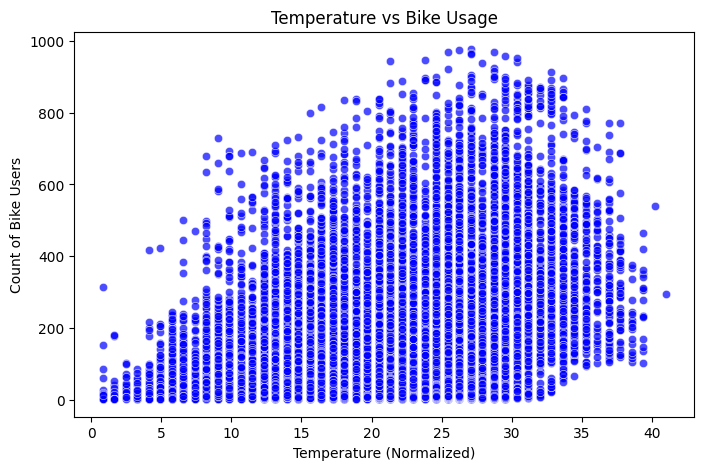

In [21]:
# 2. Hubungan Suhu dengan Jumlah Pengguna Sepeda
plt.figure(figsize=(8, 5))
sns.scatterplot(x="temp", y="cnt", data=all_df, alpha=0.7, color="blue")
plt.xlabel("Temperature (Normalized)")
plt.ylabel("Count of Bike Users")
plt.title("Temperature vs Bike Usage")
plt.show()

Suhu yang lebih tinggi yaitu pada rentang 23 hingga 32 derajat celcius berkorelasi positif dengan jumlah pengguna sepeda, menunjukkan bahwa semakin hangat cuaca, semakin banyak orang yang menggunakan sepeda. tetapi juga menunjukkan bahwa pada rentang suhu 32 hingga 40 derajat celcius akan mempengaruhi jumlah pengguna sepeda menjadi negatif, artinya semakin panas cuaca, semakin sedikit orang yang menggunakan sepeda. Hal ini mungkin disebabkan karena cuaca yang terlalu panas membuat orang merasa tidak nyaman dan tidak ingin berolahraga.

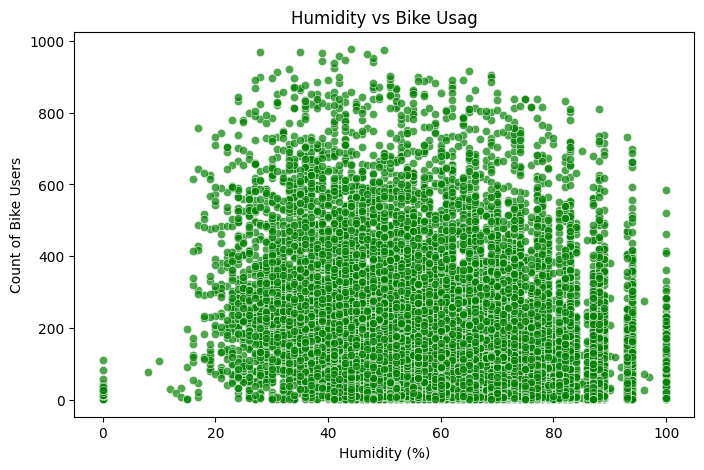

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="hum", y="cnt", data=all_df, alpha=0.7, color="green")
plt.xlabel("Humidity (%)")
plt.ylabel("Count of Bike Users")
plt.title("Humidity vs Bike Usag")
plt.show()

Kelembaban yang tinggi dapat berdampak negatif terhadap jumlah penyewa sepeda dan jika perhatikan bahwa di kelenbapan 30 hingga 60 banyak peminjaman terjadi

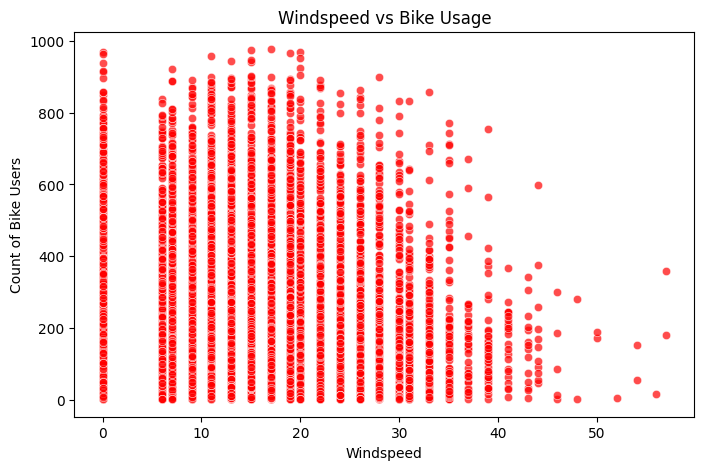

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="windspeed", y="cnt", data=all_df, alpha=0.7, color="red")
plt.xlabel("Windspeed")
plt.ylabel("Count of Bike Users")
plt.title("Windspeed vs Bike Usage")
plt.show()


dari visualisasi diatas peminjaman sepeda terbanyak terjadi pada saat kecepatan angin tidak terlalu kencang yaitu berkisar 0 sampai 20

### Pertanyaan 2: Apakah hari libur (holiday) mempengaruhi jumlah pengguna sepeda?

C:\Users\asus\AppData\Local\Temp\ipykernel_2052\578151813.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_count.index, y=holiday_count.values, palette=['blue', 'red'])


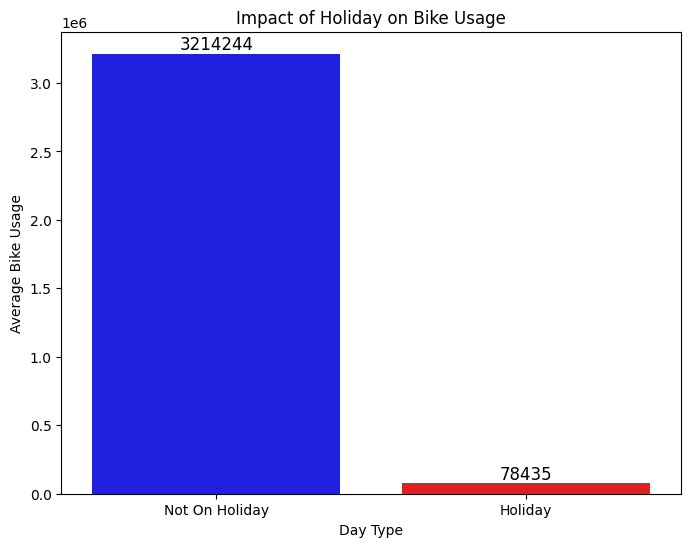

In [24]:
holiday_count = all_df.groupby('holiday')['cnt'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=holiday_count.index, y=holiday_count.values, palette=['blue', 'red'])

plt.xticks(ticks=[0, 1], labels=['Not On Holiday', 'Holiday'])
plt.xlabel("Day Type")
plt.ylabel("Average Bike Usage")
plt.title("Impact of Holiday on Bike Usage")

for i, v in enumerate(holiday_count.values):
    plt.text(i, v + 1, f"{v:.0f}", ha='center', va='bottom', fontsize=12)
plt.show()

berdasarkan analisis diatas dapat disimpulkan bahwa pada hari kerja atau hari biasa banyak pengguna meminjam atau rental sepeda daripada hari biasa yaitu sebanyak 3214244 pengguna dibandingkan dengan hari libur sebanyak 78435 pengguna. ini mungkin terjadi karena pada hari kerja atau hari biasa pengguna lebih banyak yang membutuhkan sepeda untuk beraktivitas dan untuk menggunakan kendaraan pribadi di hari libur dibandingkan dengan rental sepeda.

### Pertanyaan 3: Bagaimana tren penggunaan sepeda dari tahun ke tahun?

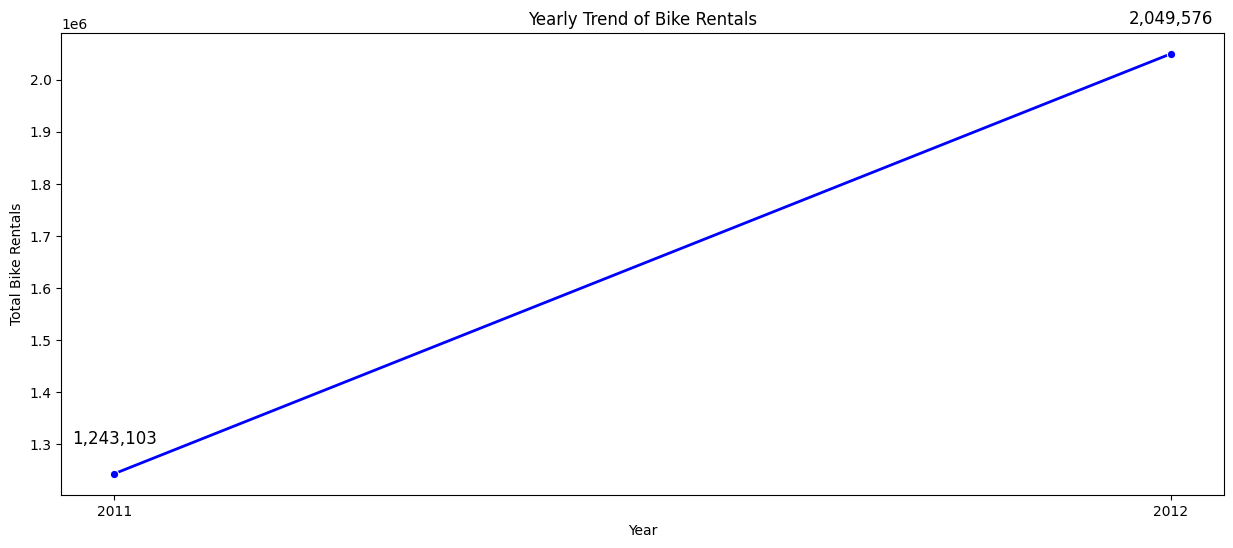

In [25]:
yearly_trend = all_df.groupby('year')['cnt'].sum()
plt.figure(figsize=(15, 6))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o", linewidth=2, color='blue')

plt.xlabel("Year")
plt.ylabel("Total Bike Rentals")
plt.title("Yearly Trend of Bike Rentals")

for i, v in enumerate(yearly_trend.values):
    plt.text(i, v + 50000, f"{v:,}", ha='center', va='bottom', fontsize=12)

plt.show()

tren rental penggunaan sepeda meningkat drastis dari tahun 2011 ke tahun 2012 . Pada tahun 2012, sepeda menjadi salah satu moda transportasi yang paling banyak di minati ini terbukti dari analisis diatas yang dimana penggunaan sepeda meningkat drastis dari tahun 2011 ke tahun 2012. yaitu sebanyak 2,049,576 penggunaan rental sepeda.

## Conclusion

1. Bagaimana pengaruh cuaca (weathersit), suhu (temp), kelembaban (hum), dan kecepatan angin (windspeed) terhadap jumlah pengguna sepeda?
    - cuaca sangat mempengaruhi dalam jumlah rental sepeda
    - pada saat cuaca cerah jumlah rental sepeda sangat tinggi dibandingkan pada saat cuaca sedang hujan atau salju ringan
    - suhu yang tinggi dapat mempengaruhi jumlah rental sepeda dan jika terlalu panas jumlah perental akan turun sedikit
    - kelembapan dan kecepatan angin yang tinggi cenderung mengurangi jumlah pesepeda
2. Apakah hari libur (holiday) mempengaruhi jumlah pengguna sepeda?
    - pada hari kerja atau hari biasa jumlah rental sepeda lebih tinggi dibandigkan pada hari libur ini menunjukkan pengguna lebih memilih menggunakan sepeda pada hari kerja atau hari biasa untuk aktivitasnya.
3. Bagaimana tren penggunaan sepeda dari tahun ke tahun?
    - tren rental sepeda menigkat drastis dari tahun 2011 ke tahun 2012 ini mungkin akan meningkat dari tahun ke tahun berikutnya

In [27]:
all_df.to_csv("dashboard/all_data.csv", index=False)